The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


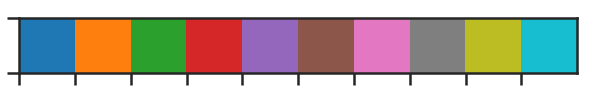

In [39]:
#from model_phantom_noise import *
from model_christos import *
from linares_plot import * 
import itertools
from joblib import Parallel, delayed
import multiprocessing

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2

#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+90) )/360)
#p_dist = int((N * (90) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
def hemap(an, order):
    dims=np.shape(an[4])
    stimon = 100/2
    stimoff = 100/2 + floor(100/2) ;
    stim2on = 1000/2
    stim2off = 1000/2 + floor(100/2) ;  
    
    RE_sorted=flipud(an[4])
    ax = sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=18,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 6, 12, 18], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    
    if order==1:
        plt.gca().plot([stimon, stimon+400], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=3) 
    if order==2:
        plt.gca().plot([500, 900], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t) 
        #plt.gca().plot([stimon, stimon+400], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t)
    #   
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_yticklabels(['0','','180', '', '360'])
    
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(570, -45)
    
    ##line stims       
    plt.plot([0, stimon], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stimon, stimon], [-15, -40], 'k-', linewidth=3)
    plt.plot([stimon, stimoff], [-40, -40], 'k-', linewidth=3)
    plt.plot([stimoff, stimoff], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stimoff, stim2on], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stim2on, stim2on], [-15, -40], 'k-', linewidth=3)
    plt.plot([stim2on, stim2off], [-40, -40], 'k-', linewidth=3)
    plt.plot([stim2off, stim2off], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stim2off, dims[1]], [-15, -15], 'k-', linewidth=3)
    #time
    plt.plot([dims[1]-500, dims[1]], [540, 540], 'k-', linewidth=3)
    plt.text(dims[1]-300, 600, '1s', fontsize=20)
    # stimulation




## Modulated circuit r1 and r2

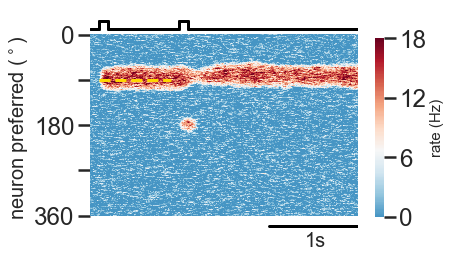

In [45]:
fee=1
fei=1
fie=1
fii=1

r1= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=90, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, 
           stim_strengthE1=9.4, stim_strengthI1=0.,
           stim_strengthE2=9.4, stim_strengthI2=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(r1,  order=1)

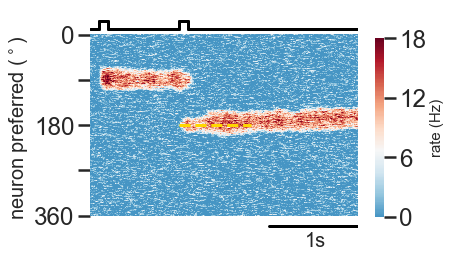

In [47]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'


r2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=90, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, 
           stim_strengthE1=9.4, stim_strengthI1=0.,
           stim_strengthE2=9.4, stim_strengthI2=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(r2, order=2)

## Stimuli strength  
### In r2 regime, changes stim strengths to make the 1st stim the one remembered  
(I also needed to modify the plot parameters to mark the first as the target)

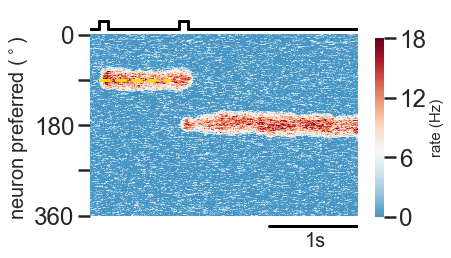

In [41]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'


same_stim_strnghths= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=90, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, 
           stim_strengthE1=9.4, stim_strengthI1=0.,
           stim_strengthE2=9.4, stim_strengthI2=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(same_stim_strnghths, order=2)

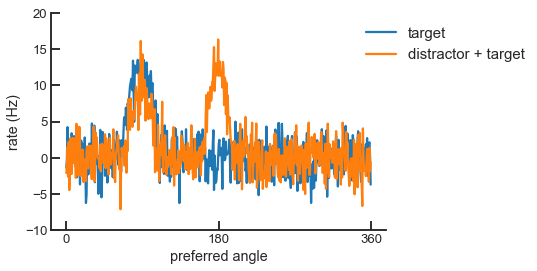

In [120]:
plt.plot(np.flipud(same_stim_strnghths[4][:, 75]), label='target')
plt.plot(np.flipud(same_stim_strnghths[4][:, 560]), label='distractor + target')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylim(-10,20)
plt.ylabel('rate (Hz)')
plt.xticks([0, 512/2, 512], ['0', '180', '360'])
plt.xlabel('preferred angle')
plt.legend(loc=2, frameon=False, prop={'size': 15}, ncol=1, bbox_to_anchor=(0.9, 1))


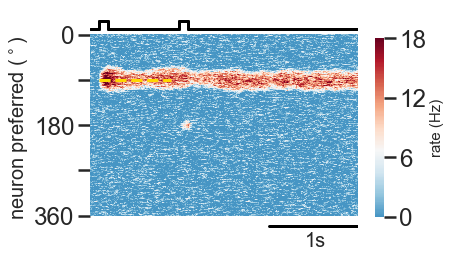

In [40]:
#### Reduce distractor strength
fee=0.94
fei=0.92
fie=1.14
fii=1.08

%config InlineBackend.figure_format = 'png' ## 'svg'


change_stim_strengths= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=90, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, 
           stim_strengthE1=14.4, stim_strengthI1=0.,
           stim_strengthE2=7., stim_strengthI2=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(change_stim_strengths, order=2)

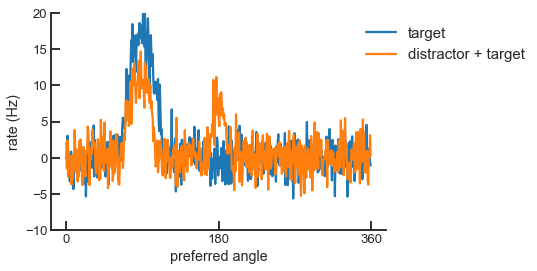

In [119]:
plt.plot(np.flipud(change_stim_strengths[4][:, 80]), label='target')
plt.plot(np.flipud(change_stim_strengths[4][:, 560]), label='distractor + target')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylim(-10,20)
plt.ylabel('rate (Hz)')
plt.xticks([0, 512/2, 512], ['0', '180', '360'])
plt.xlabel('preferred angle')
plt.legend(loc=2, frameon=False, prop={'size': 15}, ncol=1, bbox_to_anchor=(0.9, 1))


In [48]:
from model_david import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
##plotear el hetamap (se necesiat el RE)

def simulation_heatmap(RE, time_simulation, order2, angle_separation, target_onset, distractor_onset, pres_period):
    pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
    
    dims=np.shape(RE)
    dimN = dims[0]
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(RE, cmap=pal_cyan, vmin=0, vmax=45,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 15, 30, 45], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(20)
    ax.figure.axes[-1].tick_params(labelsize=20)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    p_stim = (180+angle_separation/2) * (dims[0]/360)
    p_dist = (180-angle_separation/2) * (dims[0]/360) 

    stimon = target_onset/2
    stimoff = (target_onset + pres_period) / 2
    diston = distractor_onset/2
    distoff = (distractor_onset + pres_period) / 2


    plt.gca().plot([stimon, stimon+400], [p_stim, p_stim], ls='--', color ='gold', linewidth=3) 
    #plt.gca().plot([diston, diston+400], [p_dist, p_dist], ls='--', color ='red', linewidth=1) 

    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, int(dimN/4), int(dimN/2),  int(3*dimN/4), int(dimN) ])
    plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)

    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(dimN+60, -45)

    ###

    ##line stims  
    if order2==False:
        s1on=stimon
        s1off=stimoff
        s2on=diston
        s2off=distoff
    else:
        s1on=diston
        s1off=distoff
        s2on=stimon
        s2off=stimoff

    plt.plot([0, s1on], [-15, -15], 'k-', linewidth=2)
    plt.plot([s1on, s1on], [-15, -40], 'k-', linewidth=2)
    plt.plot([s1on, s1off], [-40, -40], 'k-', linewidth=2)
    plt.plot([s1off, s1off], [-15, -40], 'k-', linewidth=2)
    plt.plot([s1off, s2on], [-15, -15], 'k-', linewidth=2)
    plt.plot([s2on, s2on], [-15, -40], 'k-', linewidth=2)
    plt.plot([s2on, s2off], [-40, -40], 'k-', linewidth=2)
    plt.plot([s2off, s2off], [-15, -40], 'k-', linewidth=2)
    plt.plot([s2off, dims[1]], [-15, -15], 'k-', linewidth=2)

    #time
    x1sec = 1000 * dims[1] / time_simulation
    plt.plot([dims[1]-x1sec, dims[1]], [dimN+30, dimN+30], 'k-', linewidth=2)
    plt.text(dims[1]-300, 600, '1s', fontsize=20);
    plt.show()



## Background input modulation --> o2

In [127]:
time_simulation=3000
presentation_period = 250
angle_separation=80

target_onset = 700
target_offset = target_onset + presentation_period
distractor_onset = 300
distractor_offset = distractor_onset + presentation_period
order2 = distractor_onset<target_onset ##boolean


background_o2 = model1(totalTime=time_simulation,  presentation_period=presentation_period,  angle_separation=angle_separation, 
           targ_onset=target_onset, dist_onset=distractor_onset,  order_2=order2,
           tauE=60, tauI=10, tauf=7000, taud=80, 
           I0I=0.4, U=0.4,
           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1,
           sigE=2.8, sigI=2.2,
           kappa_E=100, kappa_I=1.5, k_inhib=0.07, kappa_stim=50,
           N=512, plot_connectivity=False, plot_dyniamic=False, plot_heatmap=False, plot_fit=False, save_RE=True)



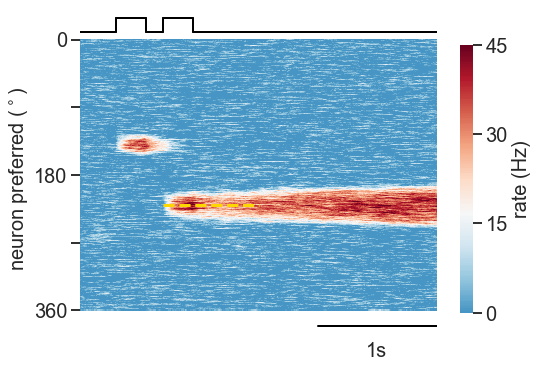

In [128]:
simulation_heatmap(RE=background_o2[1], time_simulation=time_simulation, order2=order2, 
      angle_separation=angle_separation, target_onset=target_onset, 
      distractor_onset =distractor_onset, pres_period=presentation_period)

## Background input modulation --> o1


In [129]:
time_simulation=3000
presentation_period = 250
angle_separation=-80

target_onset = 300
target_offset = target_onset + presentation_period
distractor_onset = 700
distractor_offset = distractor_onset + presentation_period
order2 = distractor_onset<target_onset ##boolean


background_o1 = model1(totalTime=time_simulation,  presentation_period=presentation_period,  angle_separation=angle_separation, 
           targ_onset=target_onset, dist_onset=distractor_onset,  order_2=order2,
           tauE=60, tauI=10, tauf=7000, taud=80, 
           I0I=0.4, U=0.4,
           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1,
           sigE=2.8, sigI=2.2,
           kappa_E=100, kappa_I=1.5, k_inhib=0.07, kappa_stim=50,
           N=512, plot_connectivity=False, plot_dyniamic=False, plot_heatmap=False, plot_fit=False, save_RE=True)

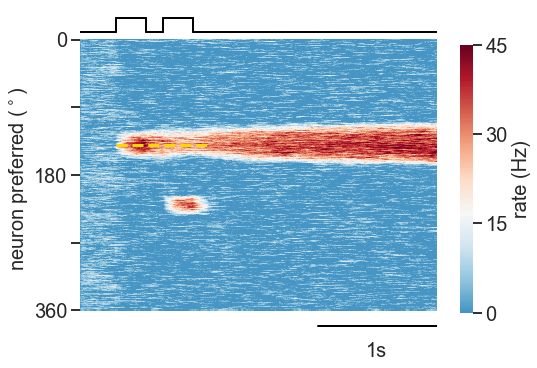

In [130]:
simulation_heatmap(RE=background_o1[1], time_simulation=time_simulation, order2=order2, 
      angle_separation=angle_separation, target_onset=target_onset, 
      distractor_onset =distractor_onset, pres_period=presentation_period)

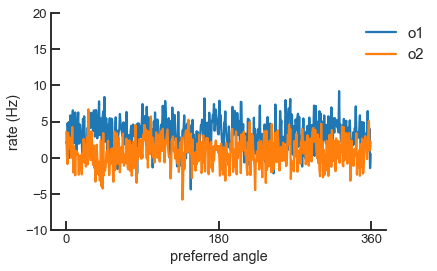

In [143]:
plt.plot(  np.flipud(np.mean(background_o1[1][:, :150], axis=1)), label='o1' )
plt.plot(  np.flipud(np.mean(background_o2[1][:, :150], axis=1)), label='o2' )

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylim(-10,20)
plt.ylabel('rate (Hz)')
plt.xticks([0, 512/2, 512], ['0', '180', '360'])
plt.xlabel('preferred angle')
plt.legend(loc=2, frameon=False, prop={'size': 15}, ncol=1, bbox_to_anchor=(0.9, 1))

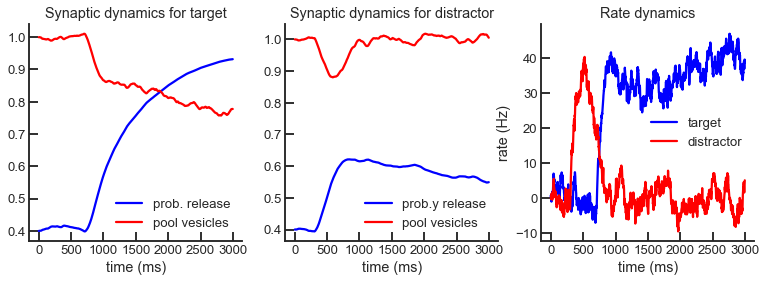

In [69]:
sns.set_context("talk", font_scale=0.8)
background_o1 = model1(totalTime=time_simulation,  presentation_period=presentation_period,  angle_separation=angle_separation, 
           targ_onset=target_onset, dist_onset=distractor_onset,  order_2=order2,
           tauE=60, tauI=10, tauf=7000, taud=80, 
           I0I=0.4, U=0.4,
           GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1,
           sigE=2.8, sigI=2.2,
           kappa_E=100, kappa_I=1.5, k_inhib=0.07, kappa_stim=50,
           N=512, plot_connectivity=False, plot_dyniamic=True, plot_heatmap=False, plot_fit=False, save_RE=True)

In [26]:
from model_simple import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Change in the kappas to have a bigger bump

-3.725929144351909


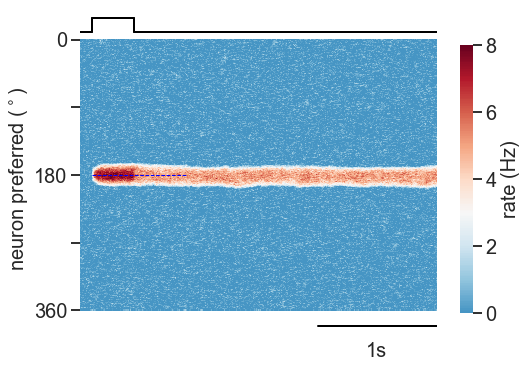

In [89]:
err =model(totalTime=3000, 
           targ_onset=100,  
           presentation_period=350,
           positions=180, 
           tauE=9, tauI=4,  n_stims=1, 
           I0E=0.1, I0I=0.5,
           GEE=0.025, GEI=0.02, GIE=0.01 , GII=0.1, 
           sigE=1.2, sigI=1.6, 
           kappa_E=300, kappa_I=18., 
           kappa_stim=100, N=512,
           plot_connectivity=False, 
           plot_rate=False, plot_hm=False, 
           plot_fit=False, save_RE=True)

print(err[0])


simulation_heatmap_R(RE=err[2], time_simulation=3000, position=180, target_onset=100, pres_period=350)

4.449266666913985


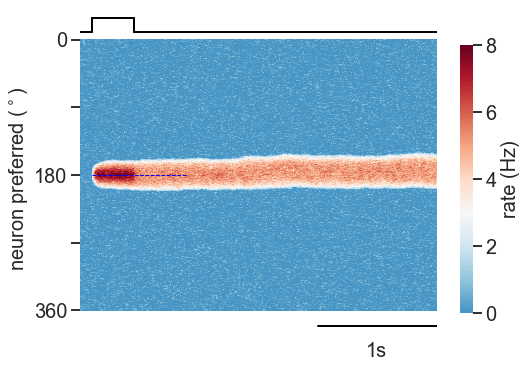

In [88]:
err =model(totalTime=3000, 
           targ_onset=100,  
           presentation_period=350,
           positions=180, 
           tauE=9, tauI=4,  n_stims=1, 
           I0E=0.1, I0I=0.5,
           GEE=0.025, GEI=0.02, GIE=0.01 , GII=0.1, 
           sigE=1., sigI=1., 
           kappa_E=150, kappa_I=7.5, 
           kappa_stim=100, N=512,
           plot_connectivity=False, 
           plot_rate=False, plot_hm=False, 
           plot_fit=False, save_RE=True)

print(err[0])


simulation_heatmap_R(RE=err[2], time_simulation=3000, position=180, target_onset=100, pres_period=350)

## changes in de conductances --> wrong balance EI

-6.0056317456412955


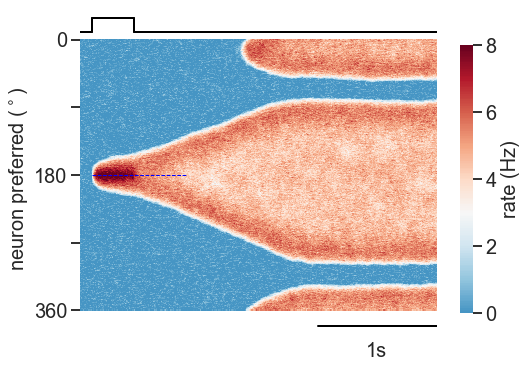

In [92]:
err =model(totalTime=3000, 
           targ_onset=100,  
           presentation_period=350,
           positions=180, 
           tauE=9, tauI=4,  n_stims=1, 
           I0E=0.1, I0I=0.5,
           GEE=0.027, GEI=0.02, GIE=0.01 , GII=0.1, 
           sigE=1., sigI=1., 
           kappa_E=150, kappa_I=7.5, 
           kappa_stim=100, N=512,
           plot_connectivity=False, 
           plot_rate=False, plot_hm=False, 
           plot_fit=False, save_RE=True)

print(err[0])


simulation_heatmap_R(RE=err[2], time_simulation=3000, position=180, target_onset=100, pres_period=350)

-113.18670163544317


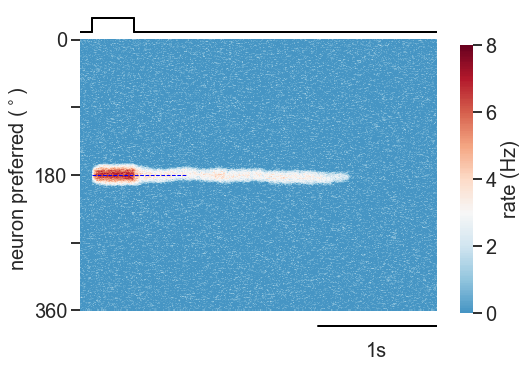

In [94]:
err =model(totalTime=3000, 
           targ_onset=100,  
           presentation_period=350,
           positions=180, 
           tauE=9, tauI=4,  n_stims=1, 
           I0E=0.1, I0I=0.5,
           GEE=0.021, GEI=0.02, GIE=0.01 , GII=0.1, 
           sigE=1., sigI=1., 
           kappa_E=150, kappa_I=7.5, 
           kappa_stim=100, N=512,
           plot_connectivity=False, 
           plot_rate=False, plot_hm=False, 
           plot_fit=False, save_RE=True)

print(err[0])


simulation_heatmap_R(RE=err[2], time_simulation=3000, position=180, target_onset=100, pres_period=350)

## Background input 

120.35261590784111


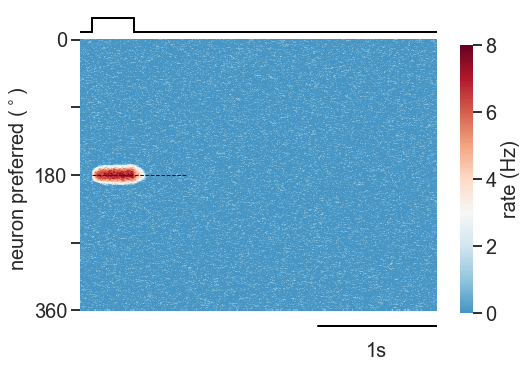

In [99]:
err =model(totalTime=3000, 
           targ_onset=100,  
           presentation_period=350,
           positions=180, 
           tauE=9, tauI=4,  n_stims=1, 
           I0E=-1., I0I=0.5,
           GEE=0.025, GEI=0.02, GIE=0.01 , GII=0.1, 
           sigE=1., sigI=1., 
           kappa_E=150, kappa_I=7.5, 
           kappa_stim=100, N=512,
           plot_connectivity=False, 
           plot_rate=False, plot_hm=False, 
           plot_fit=False, save_RE=True)

print(err[0])


simulation_heatmap_R(RE=err[2], time_simulation=3000, position=180, target_onset=100, pres_period=350)

178.56212083053853


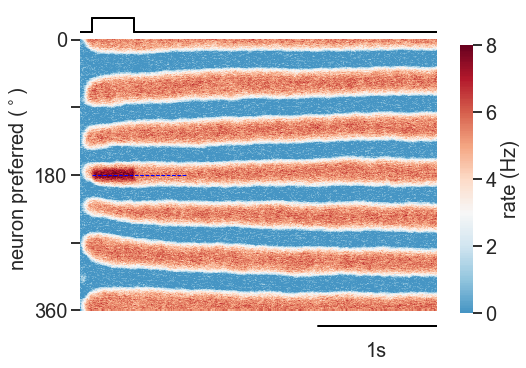

In [101]:
err =model(totalTime=3000, 
           targ_onset=100,  
           presentation_period=350,
           positions=180, 
           tauE=9, tauI=4,  n_stims=1, 
           I0E=0.5, I0I=0.5,
           GEE=0.025, GEI=0.02, GIE=0.01 , GII=0.1, 
           sigE=1., sigI=1., 
           kappa_E=150, kappa_I=7.5, 
           kappa_stim=100, N=512,
           plot_connectivity=False, 
           plot_rate=False, plot_hm=False, 
           plot_fit=False, save_RE=True)

print(err[0])


simulation_heatmap_R(RE=err[2], time_simulation=3000, position=180, target_onset=100, pres_period=350)

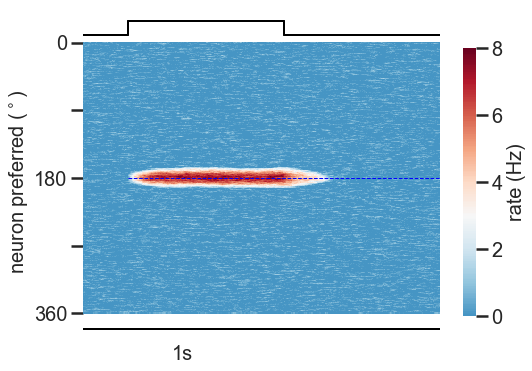

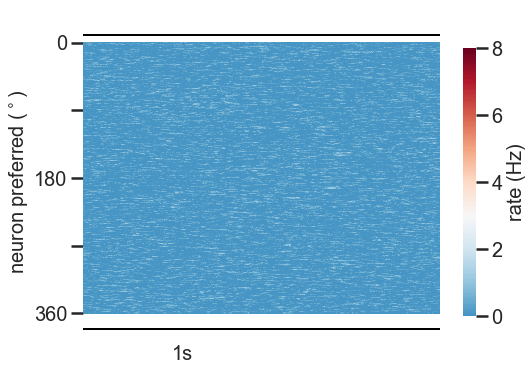

In [9]:
n_stim_1 = model(totalTime=800, 
           targ_onset=100,  
           presentation_period=350,
           positions=180, 
           tauE=9, tauI=4,  n_stims=1, 
           I0E=-1., I0I=0.5,
           GEE=0.025, GEI=0.02, GIE=0.01 , GII=0.1, 
           sigE=1., sigI=1., 
           kappa_E=150, kappa_I=7.5, 
           kappa_stim=100, N=512,
           plot_connectivity=False, 
           plot_rate=False, plot_hm=False, 
           plot_fit=False, save_RE=True)


simulation_heatmap_R(RE=n_stim_1[2], time_simulation=800, position=180, target_onset=100, pres_period=350)


n_stim_0 = model(totalTime=800, 
           targ_onset=1000,  
           presentation_period=350,
           positions=180, 
           tauE=9, tauI=4,  n_stims=1, 
           I0E=-1., I0I=0.5,
           GEE=0.025, GEI=0.02, GIE=0.01 , GII=0.1, 
           sigE=1., sigI=1., 
           kappa_E=150, kappa_I=7.5, 
           kappa_stim=100, N=512,
           plot_connectivity=False, 
           plot_rate=False, plot_hm=False, 
           plot_fit=False, save_RE=True)

simulation_heatmap_R(RE=n_stim_0[2], time_simulation=800, position=180, target_onset=1000, pres_period=350)


### Bistability plot

In [41]:
from model_simple import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
I0Es =  np.linspace(-1.5, 1., 30) #
I0Es = 20*[round(I0Es[i],3) for i in range(len(I0Es))]

In [67]:
n_stim_0_outputs = Parallel(n_jobs = 5)(delayed(model)(totalTime=800, 
           targ_onset=1000,  
           presentation_period=350,
           positions=180, 
           tauE=9, tauI=4,  n_stims=1, 
           I0E=i_t, I0I=0.5,
           GEE=0.025, GEI=0.02, GIE=0.01 , GII=0.1, 
           sigE=1., sigI=1., 
           kappa_E=150, kappa_I=7.5, 
           kappa_stim=100, N=512,
           plot_connectivity=False, 
           plot_rate=False, plot_hm=False, 
           plot_fit=False, save_RE=False) for i_t in I0Es) 


rates_0_outputs = pd.DataFrame([n_stim_0_outputs[x][3][0] for x in range(len(n_stim_0_outputs))])
rates_0_outputs['stimulus'] = 'off'
rates_0_outputs.columns=['max. rate', 'stimulus']
rates_0_outputs['I0'] = [n_stim_0_outputs[x][2] for x in range(len(n_stim_0_outputs))]
rates_0_outputs.head()

In [69]:
n_stim_1_outputs = Parallel(n_jobs = 5)(delayed(model)(totalTime=800, 
           targ_onset=100,  
           presentation_period=350,
           positions=180, 
           tauE=9, tauI=4,  n_stims=1, 
           I0E=i_t, I0I=0.5,
           GEE=0.025, GEI=0.02, GIE=0.01 , GII=0.1, 
           sigE=1., sigI=1., 
           kappa_E=150, kappa_I=7.5, 
           kappa_stim=100, N=512,
           plot_connectivity=False, 
           plot_rate=False, plot_hm=False, 
           plot_fit=False, save_RE=False) for i_t in I0Es) 

rates_1_outputs = pd.DataFrame([n_stim_1_outputs[x][3][0] for x in range(len(n_stim_1_outputs))])
rates_1_outputs['stimulus'] = 'on'
rates_1_outputs.columns=['max. rate', 'stimulus']
rates_1_outputs['I0'] = [n_stim_1_outputs[x][2] for x in range(len(n_stim_1_outputs))]
rates_1_outputs.head()

In [72]:
df_bistability=pd.concat([rates_0_outputs, rates_1_outputs])
df_bistability.head()

,max. rate,stimulus,I0
0,1.112553,off,-1.500
1,1.003945,off,-1.414
2,1.104957,off,-1.328
3,0.906878,off,-1.241
4,1.160845,off,-1.155


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


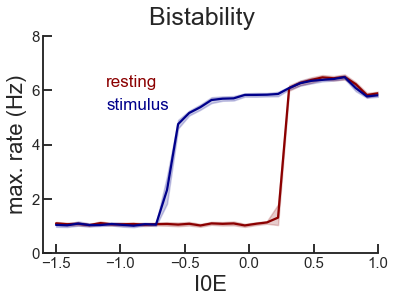

In [93]:
sns.set_context("poster", font_scale=1.1) ## poster format
sns.set_context("talk", font_scale=0.8)

fig = plt.figure()
fig.set_size_inches(6, 4)
fig.tight_layout()
fig.suptitle('Bistability ', fontsize=25, x=0.5)
ax1 = fig.add_subplot(111)
sns.lineplot(ax= ax1, x="I0", y="max. rate", hue='stimulus', palette=['darkred', 'darkblue'], data=df_bistability)
sns.set_style('white')
plt.xlabel('I0E', fontsize=22)
plt.ylabel('max. rate (Hz)', fontsize=22)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylim(0,8)
plt.yticks([0,2,4,6,8], fontsize=15)
plt.xlim(-1.6, 1.)
plt.xticks([-1.5, -1,-0.5, 0, 0.5, 1], fontsize=15)
plt.gca().tick_params(direction='in')


l = plt.legend(loc=2, frameon=False, prop={'size': 17})#, bbox_to_anchor=(1.1, 1))


hue_order=['', 'resting', 'stimulus']
palette=['black','darkred', 'darkblue']

for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);


plt.show(block=False)


In [1]:
## Simple model, distractor at different times

In [37]:
def hemap2(an, order, t2, t1=100):
    dims=np.shape(an[4])
    stimon = t1/2
    stimoff = t1/2 + floor(100/2) ;
    stim2on = t2/2
    stim2off = t2/2 + floor(100/2) ;  
    
    RE_sorted=flipud(an[4])
    ax = sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=18,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 6, 12, 18], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(15)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    
    if order==1:
        plt.gca().plot([stimon, stimon+400], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=3) 
    if order==2:
        plt.gca().plot([500, 900], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t) 
        #plt.gca().plot([stimon, stimon+400], [p_dist, p_dist], ls='--', color =ltc, linewidth=lw_t)
    #   
    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_yticklabels(['0','','180', '', '360'])
    
    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(570, -45)
    
    ##line stims       
    plt.plot([0, stimon], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stimon, stimon], [-15, -40], 'k-', linewidth=3)
    plt.plot([stimon, stimoff], [-40, -40], 'k-', linewidth=3)
    plt.plot([stimoff, stimoff], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stimoff, stim2on], [-15, -15], 'k-', linewidth=3)
    #
    plt.plot([stim2on, stim2on], [-15, -40], 'k-', linewidth=3)
    plt.plot([stim2on, stim2off], [-40, -40], 'k-', linewidth=3)
    plt.plot([stim2off, stim2off], [-15, -40], 'k-', linewidth=3)
    #
    plt.plot([stim2off, dims[1]], [-15, -15], 'k-', linewidth=3)
    #time
    plt.plot([dims[1]-500, dims[1]], [540, 540], 'k-', linewidth=3)
    plt.text(dims[1]-300, 600, '1s', fontsize=20)
    # stimulation



In [ ]:
fee=1
fei=1
fie=1
fii=1

r1= model(totalTime= 2000, targ_onset_1=100, targ_onset_2=700, angle_target_i=90, presentation_period=100,
           angle_separation=60, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,             
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, 
           stim_strengthE1=9.4, stim_strengthI1=0.,
           stim_strengthE2=9.4, stim_strengthI2=0.,
           plot_connectivity=False, plot_rate=True, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap2(r1, t2=700, order=1)

In [35]:
r1[1]

-63.99